In [1]:
#importing all we need
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#now we import the boston datset.. this datset provided by sklearn

from sklearn.datasets import load_boston

boston_data = load_boston()

In [3]:
#lets print the full description of the data
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#lets print the data
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#explaining the dataset
#the array (data) contains the features which are the independent variables
#the array (features) contains the column names of the independent variables
#target = the target variabe also known as y variable -- price of the house or dependent variables

In [6]:
#lets impute the indepent variables into a dataframe
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [7]:
#let us view it
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
#And now lets get statistical information from the dataset
print(X.describe())
X.describe()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
#Now lets load the dependent variables. which is price stored in target array
y = pd.DataFrame(boston_data.target)

In [10]:
#let us view the dependent dataset
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
# So we are have stored the dependent data in variable y and independent on variable X
#lets split our data and intialize our model

In [12]:
#intialize model

regr = linear_model.LinearRegression()
regr

LinearRegression()

In [13]:
#splitting the data into 63% train and 33% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [14]:
#fit an train the model with the training data
regr.fit(X_train,y_train)

LinearRegression()

In [15]:
#lets print the coef_ and the intercept_
regr.coef_, regr.intercept_


(array([[-1.02065294e-01,  3.92035307e-02, -6.13494400e-02,
          3.48084703e+00, -1.74598953e+01,  3.66444175e+00,
         -5.31304197e-03, -1.37067900e+00,  2.51447673e-01,
         -9.43832755e-03, -8.58133141e-01,  6.78308990e-03,
         -4.96519703e-01]]),
 array([35.83989431]))

In [16]:
#lets predict with our test data

predicted = regr.predict(X_test)
predicted

array([[21.90897572],
       [32.36829283],
       [ 9.38919345],
       [16.40673353],
       [17.80964232],
       [31.83838312],
       [25.10363218],
       [15.4942598 ],
       [21.82825591],
       [-3.63190569],
       [26.12960431],
       [15.57300292],
       [ 5.61225053],
       [ 5.58756072],
       [25.41154332],
       [34.70503462],
       [26.17912943],
       [19.13532445],
       [23.91967422],
       [14.91252997],
       [39.53465438],
       [11.07641307],
       [36.58914352],
       [26.00446715],
       [38.64469005],
       [25.17973575],
       [21.75528189],
       [18.96547913],
       [18.27571802],
       [18.60093947],
       [24.62357132],
       [23.66620392],
       [29.6987949 ],
       [24.08585329],
       [ 0.50581275],
       [24.63764742],
       [25.21913509],
       [12.19902726],
       [39.4812705 ],
       [32.23454473],
       [23.75474746],
       [ 7.056712  ],
       [20.39810217],
       [21.0026853 ],
       [31.32729178],
       [ 7

In [17]:
y_test

,0
358,22.7
197,30.3
48,14.4
450,13.4
469,20.1
...,...
212,22.4
133,18.4
279,35.1
274,32.4


In [18]:
#lets check criterias of our model -- accuracy and score

In [19]:
#the score 
regr.score(X_test,y_test)

0.7215519718844148

In [20]:
#model accuracy method 1
from sklearn.metrics import mean_squared_error
print(mean_squared_error(predicted, y_test))

#model accuracy method 2
print(np.mean((predicted - y_test)**2))

31.829631155557763
0    31.829631
dtype: float64


In [21]:
#lets save the model to a pickle file so we can use it anywhere --- off environment

import pickle

In [22]:
with open('boston_model', 'wb') as file:
    pickle.dump(regr, file)

In [23]:
with open('boston_model', 'rb') as file:
    varpick = pickle.load(file)

In [24]:
#lets see if this model was pickled

In [25]:
ls

boston_housing.ipynb  boston_model


In [26]:
#the model was pickeled with file name = boston_model
#now lets try our model using the pickeld

varpick.predict(X_test)

array([[21.90897572],
       [32.36829283],
       [ 9.38919345],
       [16.40673353],
       [17.80964232],
       [31.83838312],
       [25.10363218],
       [15.4942598 ],
       [21.82825591],
       [-3.63190569],
       [26.12960431],
       [15.57300292],
       [ 5.61225053],
       [ 5.58756072],
       [25.41154332],
       [34.70503462],
       [26.17912943],
       [19.13532445],
       [23.91967422],
       [14.91252997],
       [39.53465438],
       [11.07641307],
       [36.58914352],
       [26.00446715],
       [38.64469005],
       [25.17973575],
       [21.75528189],
       [18.96547913],
       [18.27571802],
       [18.60093947],
       [24.62357132],
       [23.66620392],
       [29.6987949 ],
       [24.08585329],
       [ 0.50581275],
       [24.63764742],
       [25.21913509],
       [12.19902726],
       [39.4812705 ],
       [32.23454473],
       [23.75474746],
       [ 7.056712  ],
       [20.39810217],
       [21.0026853 ],
       [31.32729178],
       [ 7

In [27]:
#Working --- work to continue

In [45]:
#lets visulize  np.array(y_test) and predicted

In [31]:
import matplotlib.pyplot as plt

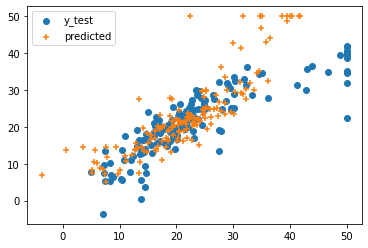

In [43]:
plt.scatter(y_test, predicted, label='y_test')
plt.scatter(predicted, y_test, marker='+', label='predicted')
plt.legend()
plt.show()